In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import cross_validation

import numpy as np
df = pd.read_csv('../data/original_data.csv',sep=' ')
# df = pd.read_csv('../data/data_for_student_case.csv')
print '\nshape of data'
print df.shape
print '\ntypes of index'
print df.dtypes
print '\ndescribe (only for float data)'
print df.describe()

/Users/borismattijssen/Programmeren/github/borismattijssen/cyber-data-analytics/assignment1/venv/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



shape of data
(236698, 15)

types of index
issuercountry           int64
txvariantcode           int64
issuer_id             float64
amount                float64
currencycode            int64
shoppercountry          int64
interaction             int64
verification            int64
cvcresponse             int64
creationdate_stamp    float64
accountcode             int64
mail_id                 int64
ip_id                   int64
card_id                 int64
label                   int64
dtype: object

describe (only for float data)
       issuercountry  txvariantcode      issuer_id        amount  \
count  236698.000000  236698.000000  236698.000000  2.366980e+05   
mean       34.888672       9.505442  485054.718988  1.903321e+04   
std        31.150806       2.537618   35891.414867  4.173824e+04   
min         0.000000       0.000000  400022.000000  5.000000e+01   
25%        18.000000      10.000000  463797.000000  4.035000e+03   
50%        18.000000      10.000000  475130.000000  

In [41]:
df.head()

,issuercountry,txvariantcode,issuer_id,amount,currencycode,shoppercountry,interaction,verification,cvcresponse,creationdate_stamp,accountcode,mail_id,ip_id,card_id,label
0,18,10,465859.0,4370.0,3,26,1,2,3,1.444259e+09,0,32318,45370,1,1
1,68,4,438088.0,13850.0,2,134,1,1,3,1.438945e+09,1,1567,33933,2,1
2,18,12,552213.0,6595.0,3,26,1,1,3,1.437862e+09,0,64936,255836,3,1
3,18,10,492181.0,2895.0,3,26,1,1,3,1.443373e+09,0,95340,242162,4,1
4,55,9,493136.0,223900.0,0,69,1,1,3,1.442081e+09,3,250940,70404,5,1


In [3]:
fraud = df.loc[df['label'] == 1]
benign = df.loc[df['label'] == 0]

In [48]:
fraud.shape

(345, 15)

In [49]:
benign.shape

(236353, 15)

{'boxes': [<matplotlib.lines.Line2D at 0x1193b9190>,
 'caps': [<matplotlib.lines.Line2D at 0x1193b99d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1193c5550>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1193c5190>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1193b9250>,
  <matplotlib.lines.Line2D at 0x1193d00d0>]}

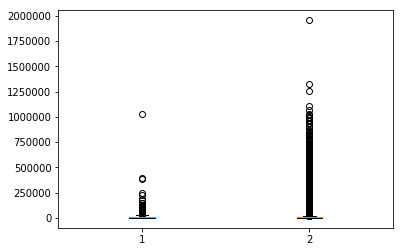

In [74]:
plt.boxplot((fraud['amount'], benign['amount']))

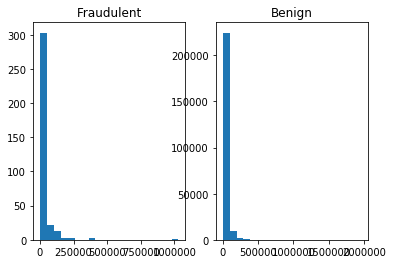

In [7]:
plt.subplot(1,2,1)
plt.title('Fraudulent')
plt.hist(fraud['amount'],bins=20)
plt.subplot(1,2,2)
plt.title('Benign')
plt.hist(benign['amount'],bins=20)
plt.savefig('amount.png')

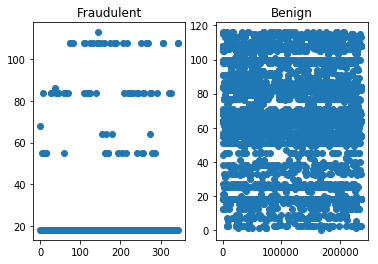

In [6]:
plt.subplot(1,2,1)
plt.title('Fraudulent')
plt.scatter(np.arange(0,len(fraud)), fraud['issuercountry'])
plt.subplot(1,2,2)
plt.title('Benign')
plt.scatter(np.arange(0,len(benign)), benign['issuercountry'])
plt.savefig('issuercountry.png')

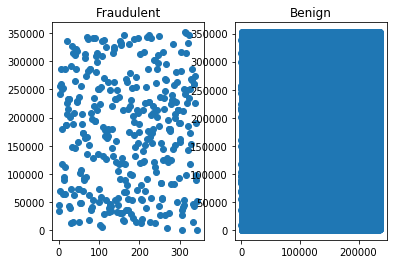

In [8]:
plt.subplot(1,2,1)
plt.title('Fraudulent')
plt.scatter(np.arange(0,len(fraud)), fraud['ip_id'])
plt.subplot(1,2,2)
plt.title('Benign')
plt.scatter(np.arange(0,len(benign)), benign['ip_id'])
plt.savefig('ip_id.png')

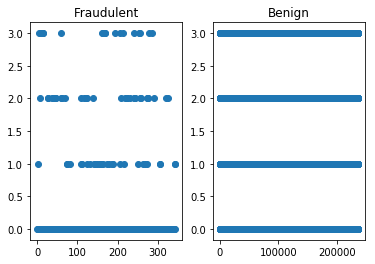

In [9]:
plt.subplot(1,2,1)
plt.title('Fraudulent')
plt.scatter(np.arange(0,len(fraud)), fraud['accountcode'])
plt.subplot(1,2,2)
plt.title('Benign')
plt.scatter(np.arange(0,len(benign)), benign['accountcode'])
plt.savefig('accountcode.png')

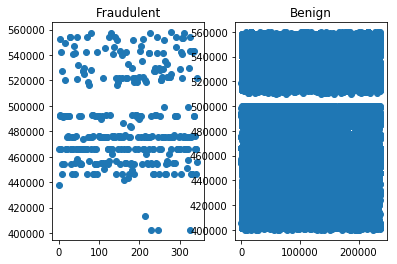

In [10]:
plt.subplot(1,2,1)
plt.title('Fraudulent')
plt.scatter(np.arange(0,len(fraud)), fraud['issuer_id'])
plt.subplot(1,2,2)
plt.title('Benign')
plt.scatter(np.arange(0,len(benign)), benign['issuer_id'])
plt.savefig('issuer_id.png')